### This script contains:

#### 1. Import libraries & dataset
#### 2. Data Checks
#### 3. Uses By Date
#### 4. Prepping for Time Series Analysis
#### 5. Line Chart
#### 6. Decomposition
#### 7. Dickey-Fuller Test
#### 8. Differencing
#### 9. Line Chart - 2nd run
#### 10. Dickey-Fuller Test - 2nd Run
#### 11. Autocorrelations

## 1. Import libraries & dataset

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
#Ensuring that the graphs you create are displayed within the notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
#Folder path into usable string
path = r'C:\Users\willm\Dropbox\1 Data Analytics Course\1 New York Citibike Hire'

In [4]:
#Import Hire Dataset
NYB2020_1day = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'NYB2020_1dayScript3.pkl'))

In [8]:
#Set Pandas to show all columns
pd.set_option("display.max_columns", None)

## 2. Data Checks

In [9]:
NYB2020_1day.head()

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,start_hour,start_date2,temp,rain_snow,day_of_week,day_of_week_number,month,month_number,TripMins,age,Day_or_More,Over_99,1col,uses_by_age,age_use,uses_by_station
0,789,2020-01-01 00:00:55.3900,2020-01-01 00:14:05.1470,504,1 Ave & E 16 St,40.732219,-73.981656,307,Canal St & Rutgers St,40.714275,-73.989900,30326,Subscriber,1992,1,0,2020-01-01,3,0.0,Wednesday,3,January,1,13,28,Less than a Day,N,1,802960.0,High Use Age,59052
1,1541,2020-01-01 00:01:08.1020,2020-01-01 00:26:49.1780,3423,West Drive & Prospect Park West,40.661063,-73.979453,3300,Prospect Park West & 8 St,40.665147,-73.976376,17105,Customer,1969,1,0,2020-01-01,3,0.0,Wednesday,3,January,1,26,51,Less than a Day,N,1,2212026.0,High Use Age,48810
2,1464,2020-01-01 00:01:42.1400,2020-01-01 00:26:07.0110,3687,E 33 St & 1 Ave,40.743227,-73.974498,259,South St & Whitehall St,40.701221,-74.012342,40177,Subscriber,1963,1,0,2020-01-01,3,0.0,Wednesday,3,January,1,24,57,Less than a Day,N,1,197375.0,Mid Use Age,73511
3,592,2020-01-01 00:01:45.5610,2020-01-01 00:11:38.1550,346,Bank St & Hudson St,40.736529,-74.006180,490,8 Ave & W 33 St,40.751551,-73.993934,27690,Subscriber,1980,1,0,2020-01-01,3,0.0,Wednesday,3,January,1,10,40,Less than a Day,N,1,374103.0,Mid Use Age,38585
4,702,2020-01-01 00:01:45.7880,2020-01-01 00:13:28.2400,372,Franklin Ave & Myrtle Ave,40.694546,-73.958014,3637,Fulton St & Waverly Ave,40.683239,-73.965996,32583,Subscriber,1982,1,0,2020-01-01,3,0.0,Wednesday,3,January,1,12,38,Less than a Day,N,1,444645.0,High Use Age,8059


In [10]:
NYB2020_1day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19487603 entries, 0 to 19506856
Data columns (total 31 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tripduration             int64  
 1   starttime                object 
 2   stoptime                 object 
 3   start_station_id         int16  
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           int16  
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bikeid                   int32  
 12  usertype                 object 
 13  birth_year               int16  
 14  gender                   int8   
 15  start_hour               int8   
 16  start_date2              object 
 17  temp                     int8   
 18  rain_snow                float16
 19  day_of_week              object 
 20  day_of_week_number       int8   
 21  month 

In [12]:
NYB2020_1day.tail()

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,start_hour,start_date2,temp,rain_snow,day_of_week,day_of_week_number,month,month_number,TripMins,age,Day_or_More,Over_99,1col,uses_by_age,age_use,uses_by_station
19506852,2045,2020-12-31 23:58:21.7040,2021-01-01 00:32:27.1570,526,E 33 St & 5 Ave,40.747659,-73.984907,3614,Crescent St & 30 Ave,40.768692,-73.924957,36467,Subscriber,1994,1,23,2020-12-31,7,1.0,Thursday,4,December,12,34,26,Less than a Day,N,1,690925.0,High Use Age,38540
19506853,288,2020-12-31 23:58:37.8400,2021-01-01 00:03:26.3250,3307,West End Ave & W 94 St,40.794165,-73.974124,3383,Cathedral Pkwy & Broadway,40.804213,-73.966991,47749,Subscriber,1969,0,23,2020-12-31,7,1.0,Thursday,4,December,12,5,51,Less than a Day,N,1,2212026.0,High Use Age,22748
19506854,152,2020-12-31 23:58:52.8090,2021-01-01 00:01:25.6720,3510,Adam Clayton Powell Blvd & W 123 St,40.807832,-73.949373,3518,Lenox Ave & W 126 St,40.808442,-73.945209,48691,Customer,1969,0,23,2020-12-31,7,1.0,Thursday,4,December,12,3,51,Less than a Day,N,1,2212026.0,High Use Age,11290
19506855,654,2020-12-31 23:59:55.9550,2021-01-01 00:10:50.6050,4073,W 51 St & Rockefeller Plaza,40.759700,-73.978082,500,Broadway & W 51 St,40.762288,-73.983362,49564,Subscriber,1994,1,23,2020-12-31,7,1.0,Thursday,4,December,12,11,26,Less than a Day,N,1,690925.0,High Use Age,8165
19506856,2589,2020-12-31 23:59:57.4070,2021-01-01 00:43:06.4490,3581,Underhill Ave & Lincoln Pl,40.674012,-73.967146,3581,Underhill Ave & Lincoln Pl,40.674012,-73.967146,47364,Customer,1969,0,23,2020-12-31,7,1.0,Thursday,4,December,12,43,51,Less than a Day,N,1,2212026.0,High Use Age,14734


## 3. Uses By Date

In [13]:
#Creating a GroupBy to give total uses by each 'Date' in a new column.
NYB2020_1day["uses_by_date"] = NYB2020_1day.groupby("start_date2")['1col'].transform("sum")

In [14]:
#Requesting to just view 2 columns to see the new flag working
NYB2020_1day[['start_date2', 'uses_by_date']].tail(30)

,start_date2,uses_by_date
19506827,2020-12-31,26291.0
19506828,2020-12-31,26291.0
19506829,2020-12-31,26291.0
19506830,2020-12-31,26291.0
19506831,2020-12-31,26291.0
19506832,2020-12-31,26291.0
19506833,2020-12-31,26291.0
19506834,2020-12-31,26291.0
19506835,2020-12-31,26291.0
19506836,2020-12-31,26291.0


In [18]:
NYB2020_1day['start_date2'].value_counts(dropna = False, ascending=True)

2020-12-17       178
2020-03-23      3997
2020-04-13      7781
2020-03-28      8856
2020-04-26      9569
               ...  
2020-09-11     94566
2020-10-03     95475
2020-11-07     98373
2020-09-26     99193
2020-09-12    101385
Name: start_date2, Length: 366, dtype: int64

##### - Only 178 hires on the 17th of Dec? Confirm no loss of entries, then flag it for analysis later.

In [21]:
#Confirming that I haven't lost any entries
NYB2020_1day.shape

(19487603, 32)

### - Exporting the Dataset

In [46]:

NYB2020_1day.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'NYB2020_1dayScript6.pkl'))

In [15]:
%%time
#Creating a subset of the unique dates
NYB2020_1dayUniqueDate = NYB2020_1day.drop_duplicates(subset = ["start_date2"])

Wall time: 1.23 s


In [16]:
NYB2020_1dayUniqueDate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 19480523
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tripduration             366 non-null    int64  
 1   starttime                366 non-null    object 
 2   stoptime                 366 non-null    object 
 3   start_station_id         366 non-null    int16  
 4   start_station_name       366 non-null    object 
 5   start_station_latitude   366 non-null    float64
 6   start_station_longitude  366 non-null    float64
 7   end_station_id           366 non-null    int16  
 8   end_station_name         366 non-null    object 
 9   end_station_latitude     366 non-null    float64
 10  end_station_longitude    366 non-null    float64
 11  bikeid                   366 non-null    int32  
 12  usertype                 366 non-null    object 
 13  birth_year               366 non-null    int16  
 14  gender               

##### 2020 was a Leap Year, and so has 366 days

In [17]:
#Requesting to just view 2 columns to see the new flag working
NYB2020_1dayUniqueDate[['start_date2', 'uses_by_date']].tail(15)

,start_date2,uses_by_date
19127475,2020-12-17,178.0
19127654,2020-12-18,14923.0
19142618,2020-12-19,16689.0
19159356,2020-12-20,16319.0
19175696,2020-12-21,31397.0
19207111,2020-12-22,37232.0
19244367,2020-12-23,40426.0
19284821,2020-12-24,32577.0
19317427,2020-12-25,11835.0
19329277,2020-12-26,19762.0


In [29]:
#Creating a subset of just the 2 columns
NYB2020_1dayUniqueDate2col = NYB2020_1dayUniqueDate[['start_date2', 'uses_by_date']]

In [30]:
NYB2020_1dayUniqueDate2col.head(30)

,start_date2,uses_by_date
0,2020-01-01,18099.0
18114,2020-01-02,41531.0
59670,2020-01-03,31851.0
91543,2020-01-04,29407.0
120979,2020-01-05,27567.0
148568,2020-01-06,42713.0
191306,2020-01-07,46497.0
237841,2020-01-08,42384.0
280241,2020-01-09,39321.0
319585,2020-01-10,50775.0


In [31]:
NYB2020_1dayUniqueDate2col.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 19480523
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   start_date2   366 non-null    object 
 1   uses_by_date  366 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.6+ KB


## 4. Prepping for Time Series Analysis

In [32]:
# Set the "Date" column as the index

from datetime import datetime

NYB2020_1dayUniqueDate2col['datetime'] = pd.to_datetime(NYB2020_1dayUniqueDate2col['start_date2'], dayfirst=True) # Create a datetime column from "Date.""
NYB2020_1dayUniqueDate2col = NYB2020_1dayUniqueDate2col.set_index('datetime') # Set the datetime as the index of the dataframe.
NYB2020_1dayUniqueDate2col.drop(['start_date2'], axis=1, inplace=True) # Drop the "Date" column.
NYB2020_1dayUniqueDate2col.tail(20)

,uses_by_date
datetime,
2020-12-12,53456.0
2020-12-13,61022.0
2020-12-14,25774.0
2020-12-15,44745.0
2020-12-16,26291.0
2020-12-17,178.0
2020-12-18,14923.0
2020-12-19,16689.0
2020-12-20,16319.0


In [33]:
NYB2020_1dayUniqueDate2col.columns

Index(['uses_by_date'], dtype='object')

In [34]:
type(NYB2020_1dayUniqueDate2col)

pandas.core.frame.DataFrame

## 5. Line Chart

Wall time: 53 ms


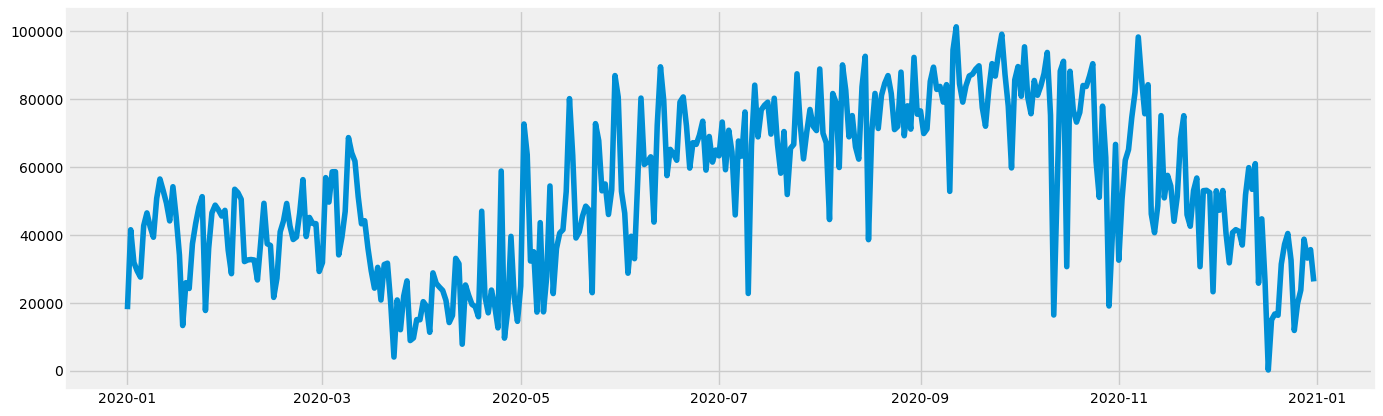

In [35]:
%%time

plt.figure(figsize=(15,5), dpi=100)
plt.plot(NYB2020_1dayUniqueDate2col)

## 6. Decomposition

In [36]:
#Decomposing the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(NYB2020_1dayUniqueDate2col, model='additive')

In [37]:
from pylab import rcParams

rcParams['figure.figsize'] = 18, 7

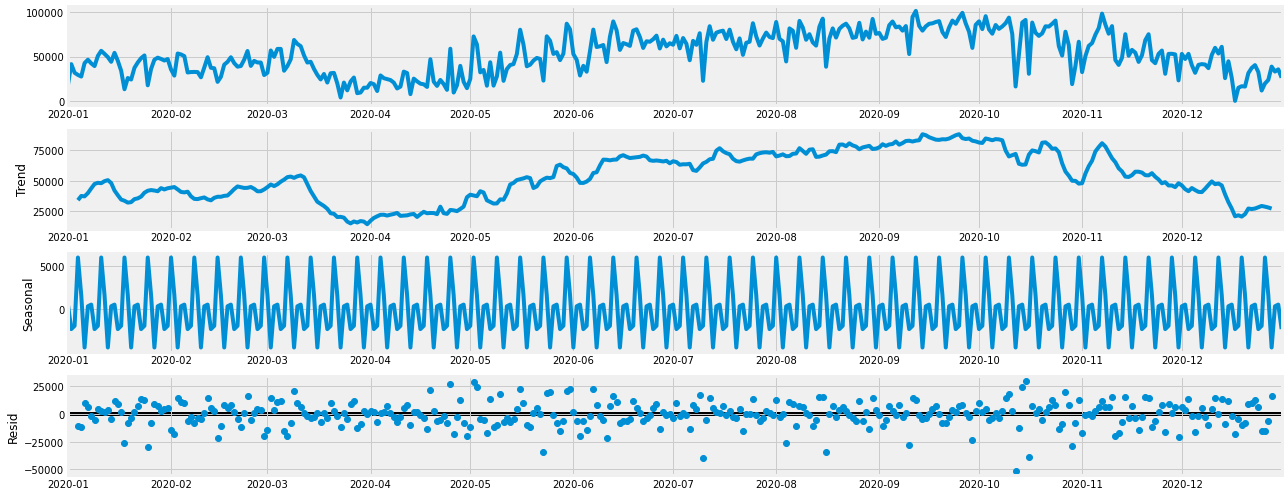

In [38]:
# Plot the separate components

decomposition.plot()
plt.show()

### The 'Trend' shows that more bikes get hired around August to November, with the lowest hires being around April of each year.
### The 'Seasonal' has a pattern to the spikes, as would be expected.

## 7. Dickey-Fuller Test

In [39]:
from statsmodels.tsa.stattools import adfuller 

def dickey_fuller(timeseries): 
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

dickey_fuller(NYB2020_1dayUniqueDate2col['uses_by_date'])

Dickey-Fuller Stationarity test:
Test Statistic                  -0.873922
p-value                          0.796439
Number of Lags Used             14.000000
Number of Observations Used    351.000000
Critical Value (1%)             -3.449119
Critical Value (5%)             -2.869810
Critical Value (10%)            -2.571176
dtype: float64


### The Test Statistic is bigger than all the 'Critical Values', therefore we can NOT reject the null hypothesis. 

## 8. Differencing

In [40]:
NYB2020_1dayUniqueDate2col2 = NYB2020_1dayUniqueDate2col - NYB2020_1dayUniqueDate2col.shift(1)

In [41]:
#Removing the missing values
NYB2020_1dayUniqueDate2col2.dropna(inplace = True)

In [42]:
NYB2020_1dayUniqueDate2col2.columns

Index(['uses_by_date'], dtype='object')

## 9. Line Chart - 2nd run

Wall time: 13.1 ms


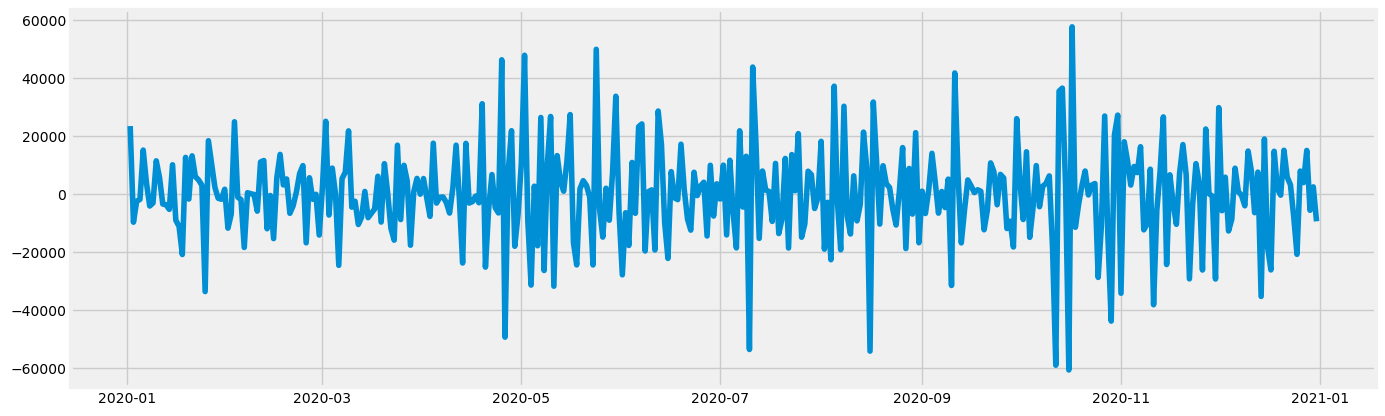

In [43]:
%%time

plt.figure(figsize=(15,5), dpi=100)
plt.plot(NYB2020_1dayUniqueDate2col2)

## 10. Dickey-Fuller Test - 2nd Run

In [44]:
from statsmodels.tsa.stattools import adfuller

def dickey_fuller(timeseries):
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

dickey_fuller(NYB2020_1dayUniqueDate2col2['uses_by_date'])

Dickey-Fuller Stationarity test:
Test Statistic                -7.973670e+00
p-value                        2.738459e-12
Number of Lags Used            1.300000e+01
Number of Observations Used    3.510000e+02
Critical Value (1%)           -3.449119e+00
Critical Value (5%)           -2.869810e+00
Critical Value (10%)          -2.571176e+00
dtype: float64


### The Test Statistic is now smaller than all the 'Critical Values', therefore we CAN reject the null hypothesis.

## 11. Autocorrelations

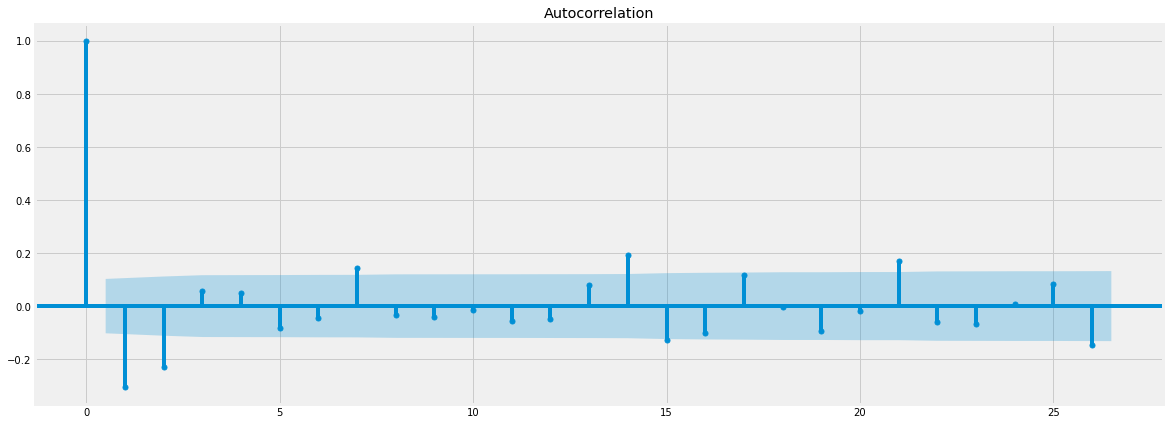

In [45]:
# Check out a plot of autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(NYB2020_1dayUniqueDate2col2)
plt.show()